In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Reading the dataset

In [2]:
df=pd.read_csv("titanic_dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking the basic details of dataset

In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Making passenger ID as the index
df=df.set_index("PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing

In [8]:
#Checking for null values.
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are null values in Age,Cabin,Embarked columns.

# Handling null values.

In [9]:
# Set the limit
# Drop columns using that limit
limit = len(df) * 0.7
df=df.dropna(axis=1, thresh=limit)
#View columns in the dataset
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

Cabin column is dropped ,since it had more 70% of null values.

In [10]:
df.shape

(891, 10)

In [11]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [12]:
#Replacing the Age column null values with mean,median or mode.
mean=df["Age"].mean()
median=df["Age"].median()
mode=df["Age"].mode()
print(f"Mean = {mean}")
print(f"Median = {median}")
print(f"Mode = {mode}")

Mean = 29.69911764705882
Median = 28.0
Mode = 0    24.0
Name: Age, dtype: float64


In [13]:
#Replacing age column with median
df["Age"]=df["Age"].fillna(median)

#Replacing th categorical type with most frequently occuring values in the column.
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].value_counts().index[0])

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

All null values are handled.

<AxesSubplot:>

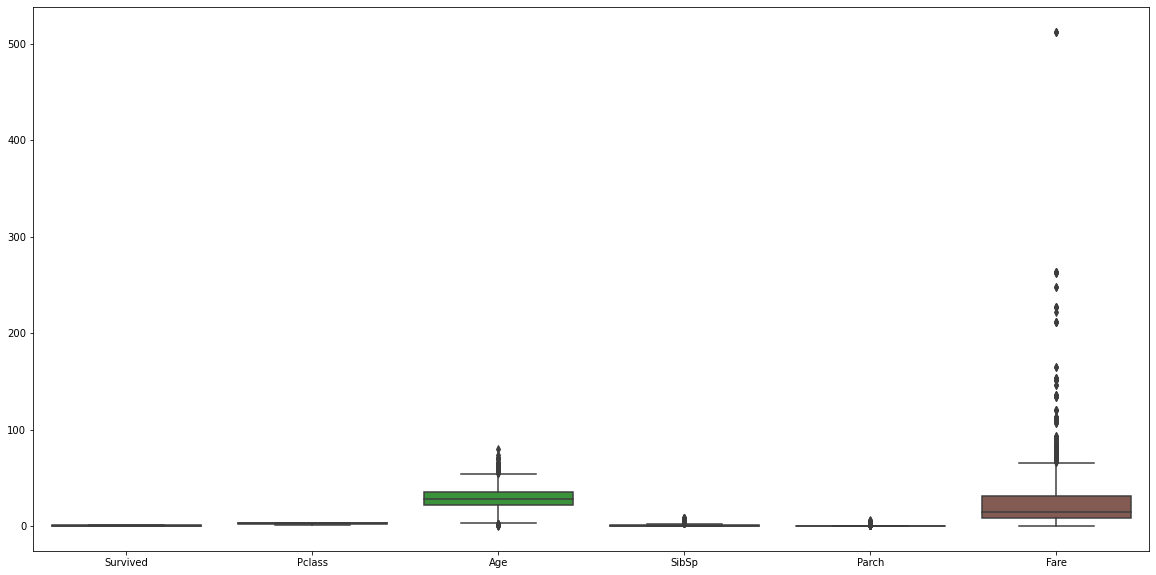

In [15]:
#Checking for outliers.
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

There are visible outliers in the Age and Fare column.

# Handling outliers

In [16]:
#Finding outlier using IQR
Q1=np.percentile(df["Fare"],25)
Q3=np.percentile(df["Fare"],75)
IQR=Q3-Q1
print("Interquartile Range",IQR)
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(f"Upper limit and lower limit are {upper_limit} and {lower_limit}.")

Interquartile Range 23.0896
Upper limit and lower limit are 65.6344 and -26.724.


In [17]:
outlier = []
for i in df['Fare']:
    if ((i>upper_limit) | (i<lower_limit)):
        outlier.append(i)

In [18]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [19]:
df['Fare']=np.where(df['Fare']>upper_limit,upper_limit,np.where(df['Fare']<lower_limit,lower_limit,df['Fare']))

C:\Users\ollak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

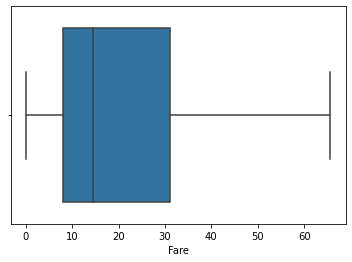

In [20]:
sns.boxplot(df['Fare'])

In [21]:
#For the outliers in Age column
print('skewness value of Age: ',df['Age'].skew())

skewness value of Age:  0.5102446555756495


Since skewness value of age falls within the range of -1 to 1,it contributes to a normal distribution. So there is no need of outlier handling.

# Feature Reduction and feature engineering

In [22]:
#We can drop columns which are not contributing much to the model.
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,65.6344,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [23]:
#ONe hot Encoding
df=pd.get_dummies(df)

In [24]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,65.6344,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [25]:
df.shape

(891, 11)

# Scaling

In [26]:
scaled= MinMaxScaler()
scaled=scaled.fit_transform(df)
col_names=df.columns

In [27]:
scaled_data=pd.DataFrame(scaled,columns=col_names)
scaled_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.110460,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,1.000000,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.120745,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.809027,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.122649,0.0,1.0,0.0,0.0,1.0


# Modelling

In [28]:
y=scaled_data['Survived']
X=scaled_data.drop('Survived',axis=1)

In [29]:
#Training the model with selected features
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [30]:
#Fitting with different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [31]:
models={'RandomForestClassifier':RandomForestClassifier(),
        'LogisticRegression':LogisticRegression(),
        'KNeighborsClassifier':KNeighborsClassifier(),
        'SVC':SVC(),
        'DecisionTreeClassifier':DecisionTreeClassifier(),
        'BernoulliNB':BernoulliNB(),
        'GaussianNB':GaussianNB()
       }

for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+' trained')

RandomForestClassifier trained
LogisticRegression trained
KNeighborsClassifier trained
SVC trained
DecisionTreeClassifier trained
BernoulliNB trained
GaussianNB trained


In [32]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,confusion_matrix
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(X_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred,average='weighted'))
    model_test_f1_score.append(f1_score(y_test,y_pred,average='weighted'))
    model_test_precision_score.append(precision_score(y_test,y_pred,average='weighted'))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))
confusion_matrix={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  'SVM':model_conf_mat[3],
                  'DecisionTree':model_conf_mat[4],
                  'BernolliNB':model_conf_mat[5],
                  'GaussianNB':model_conf_mat[6],
                 }
confusion_matrix

{'Random Forest': array([[89, 16],
        [18, 56]], dtype=int64),
 'Logistic regression': array([[88, 17],
        [21, 53]], dtype=int64),
 'KNN': array([[94, 11],
        [20, 54]], dtype=int64),
 'SVM': array([[95, 10],
        [27, 47]], dtype=int64),
 'DecisionTree': array([[85, 20],
        [19, 55]], dtype=int64),
 'BernolliNB': array([[88, 17],
        [22, 52]], dtype=int64),
 'GaussianNB': array([[81, 24],
        [16, 58]], dtype=int64)}

In [33]:
Models = ['Random Forest','Logistic regression','KNN','SVM','DecisionTree','BernolliNB','GaussianNB']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Random Forest,0.810056,0.809651,0.810056,0.809453
1,Logistic regression,0.787709,0.786745,0.787709,0.786588
2,KNN,0.826816,0.824768,0.826816,0.827128
3,SVM,0.793296,0.787624,0.793296,0.797653
4,DecisionTree,0.782123,0.782333,0.782123,0.782592
5,BernolliNB,0.782123,0.780847,0.782123,0.780827
6,GaussianNB,0.776536,0.777841,0.776536,0.782245


Here KNN classifier gives most accuracy.